<a href="https://colab.research.google.com/github/lauratcc18/IAMINTIC/blob/main/PROYECTOAPLICADO_FASE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#BASE DE DATOS CENSO AGROPECUARIO DEL MUNICIPIO DE PAIPA BOYACÁ https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/CENSO-AGROPECUARIO-DEL-MUNICIPIO-DE-PAIPA-BOYAC-/6wva-m4hg/data_preview
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cargar datos
url="https://www.datos.gov.co/resource/6wva-m4hg.csv"
#Conjunto de datos
df=pd.read_csv(url)
#obtener estadisticas descriptivas
print(df.describe())
print(df.columns)
print(df.columns.tolist())

       a_o_censo      nivel4      nivel5  nivel6  cod_famili         consec  \
count      312.0  312.000000  312.000000   312.0       312.0     312.000000   
mean      2018.0    1.602564   45.301282     0.0         1.0    6805.233974   
std          0.0    0.811330   98.227371     0.0         0.0    6022.869219   
min       2018.0    1.000000    1.000000     0.0         1.0     540.000000   
25%       2018.0    1.000000    5.000000     0.0         1.0    5639.750000   
50%       2018.0    1.000000   14.000000     0.0         1.0    6643.000000   
75%       2018.0    2.000000   38.000000     0.0         1.0    7600.250000   
max       2018.0    3.000000  410.000000     0.0         1.0  108485.000000   

           area_ded     ded_recreo    ded_agrico      ded_pecua  ...  \
count  3.120000e+02     312.000000    312.000000     312.000000  ...   
mean   8.171144e+04    7042.041667   3436.089744    8283.067308  ...   
std    9.098342e+05   35547.282432   8151.994029   39968.478912  ...   


           c_d_dep       c_d_mun          a_o  rea_sembrada_ha  \
count  1000.000000   1000.000000  1000.000000      1000.000000   
mean     34.248000  34663.923000  2011.302000        60.735000   
std      21.189041  21164.453759     3.908205       218.299064   
min       5.000000   5001.000000  2006.000000         0.000000   
25%      19.000000  19807.000000  2007.000000         4.000000   
50%      27.000000  27425.000000  2011.000000        13.500000   
75%      50.000000  50068.250000  2015.000000        45.000000   
max      91.000000  91540.000000  2018.000000      3724.000000   

       rea_cosechada_ha  producci_n_t  rendimiento_t_ha  
count       1000.000000   1000.000000        932.000000  
mean          47.882000    403.013000          7.149388  
std          164.572556   1826.735607          6.246113  
min            0.000000      0.000000          0.240000  
25%            3.000000      8.000000          2.000000  
50%           10.000000     42.000000          6.000000  

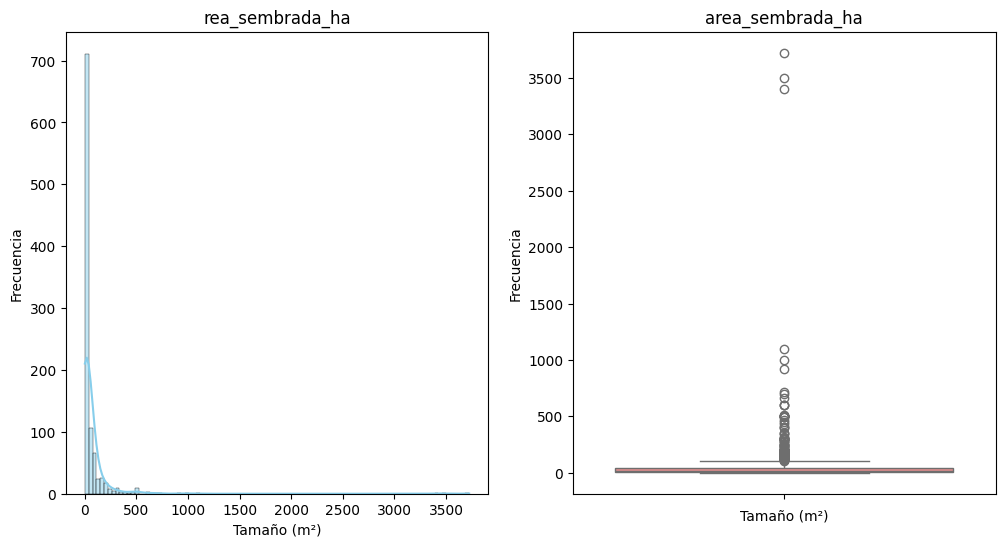

<Axes: xlabel='departamento', ylabel='Count'>

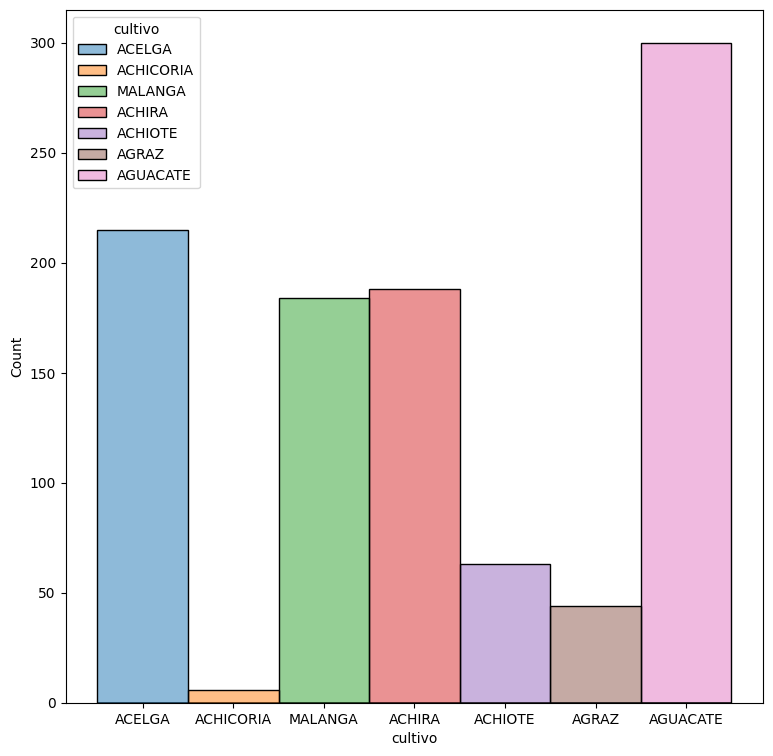

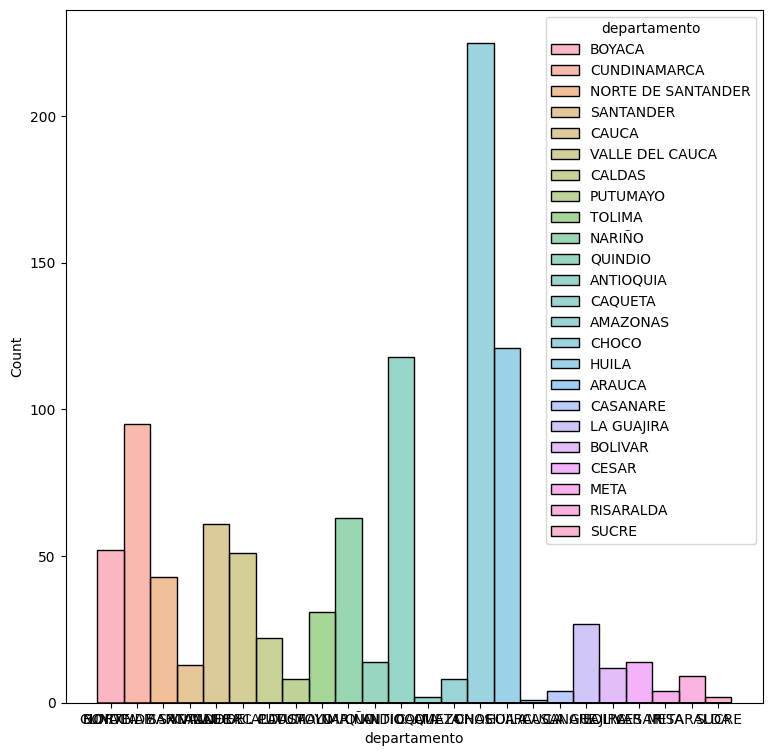

In [41]:
# Registto evaluaciones Agropecuarias por consenso DEPARTAMENTO DE BOYACÁ https://www.datos.gov.co/resource/u958-pr9h.csv
#https://www.datos.gov.co/resource/2pnw-mmge.csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
#Cargar datos
url="https://www.datos.gov.co/resource/2pnw-mmge.csv"
#Conjunto de datos
df=pd.read_csv(url)


#ANALISIS UNIVARIABLE
#obtener estadisticas descriptivas
print(df.describe())
print(df.columns)
print(df.columns.tolist())


#visualizar histograma y diagrama de caja
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

sns.histplot(df['rea_sembrada_ha'],bins=100,kde=True,color='skyblue')
plt.title('rea_sembrada_ha')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
sns.boxplot(y='rea_sembrada_ha',data=df,color='lightcoral')
plt.title('area_sembrada_ha')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Frecuencia')
plt.show()



# Género: cuenta cuántosCULTIVOS HAY
df.cultivo.value_counts()

# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,9))
sns.histplot(data=df,x="cultivo",hue="cultivo")

# Género: cuenta cuántosCULTIVOS HAY
df.departamento.value_counts()

# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,9))
sns.histplot(data=df,x="departamento",hue="departamento")






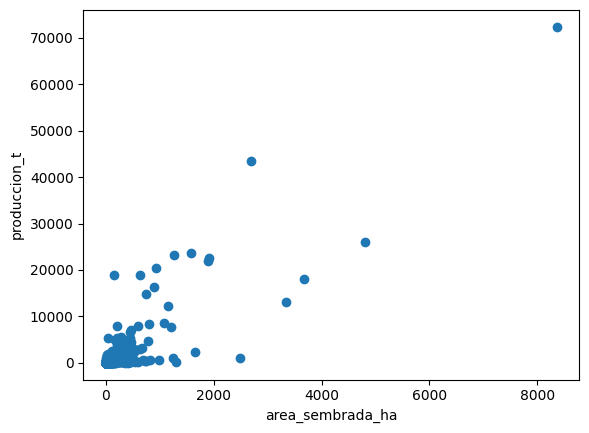

cantidad de nullos tipo                 0
municipio            0
cultivo              0
periodo              0
area_sembrada_ha     0
area_cosechada_ha    0
produccion_t         0
rendimiento_t_ha     1
dtype: int64
                                 tipo     municipio          cultivo periodo  \
0                CULTIVOS PERMANENTES       OTANCHE             CAFE    2011   
1                CULTIVOS PERMANENTES  CHIQUINQUIRA  TOMATE DE ARBOL    2011   
2                CULTIVOS PERMANENTES      JENESANO         AGUACATE    2011   
3                CULTIVOS PERMANENTES      CORRALES              UVA    2011   
4                CULTIVOS PERMANENTES       BRICEÑO         CITRICOS    2011   
..                                ...           ...              ...     ...   
995  CULTIVOS TRANSITORIOS SEMESTRE A        BOYACA        ZANAHORIA   2011A   
996  CULTIVOS TRANSITORIOS SEMESTRE A         CHITA           CEBADA   2011A   
997  CULTIVOS TRANSITORIOS SEMESTRE A          TOTA           AR

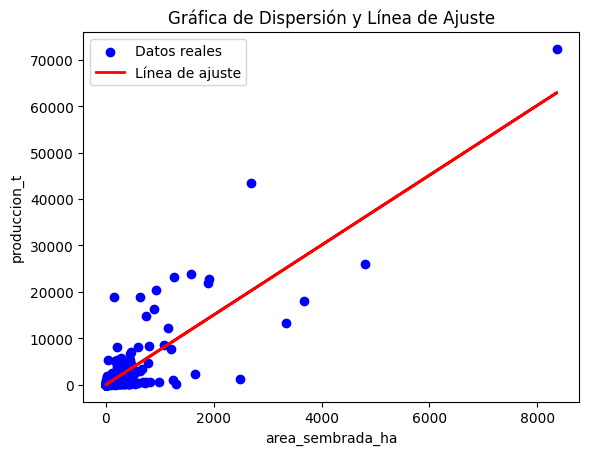

In [32]:
#Gráfica los datos del set de juguete
# Definir características (X) y variable objetivo (y)
X = df[['area_sembrada_ha']]  # Convertir a DataFrame para que sea compatible con el modelo
y = df['produccion_t']
plt.scatter(X,y)
plt.xlabel('area_sembrada_ha')
plt.ylabel('produccion_t')
plt.show()


#LIMPIEZA DE DATOS
# Verificar datos faltantes
print("cantidad de nullos",df.isnull().sum())

# Imputar o reemplazar valores faltantes si fuera necesario
#df['Tamaño'].fillna(df['Tamaño'].mean(), inplace=True)
#df['Ventas'].fillna(df['Ventas'].mean(), inplace=True)
 #eliminar nulos
df.dropna(inplace=True)
print(df)
# Eliminar duplicados si los hubiera
df.drop_duplicates(inplace=True)



#MODELO DE REGRESION

model = LinearRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Calcular R^2
r2 = r2_score(y, y_pred)
print(f'Coeficiente de determinación (R^2): {r2:.2f}')


plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de ajuste')
plt.xlabel('area_sembrada_ha')
plt.ylabel('produccion_t')
plt.title('Gráfica de Dispersión y Línea de Ajuste')
plt.legend()
plt.show()